In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def mean_se(steps,y_cold,y_hot,initial=100):
    l_cold=[]
    l_hot=[]
    for i in range(initial,len(y_cold),steps):
        l_cold+=[y_cold[i]]
        l_hot+=[y_hot[i]]
        
    l_cold = np.array(l_cold)
    l_hot = np.array(l_hot)

    msec = np.mean(l_cold), np.sqrt(np.var(l_cold)/len(l_cold)) #mean, standard error cold start (mean,error)
    mseh = np.mean(l_hot), np.sqrt(np.var(l_hot)/len(l_hot)) #mean, standard error hot start (mean,error)

    #mssec = np.mean(l_cold**2), np.mean((l_cold**2)*np.mean(l_cold)**2) #mean squared, standard error cold start
    #msseh = np.mean(l_hot**2), np.mean((l_hot**2)*np.mean(l_hot)**2) #mean squared, standard error hot start

    return msec, mseh, l_cold, l_hot

In [3]:
def plot_ising(T,L,plot=True):
    df_cold = pd.read_csv(f'./Datos/Ising/ising_2d_cold_t{T}_{L}.csv')
    x_cold = df_cold["sweep"]
    y_cold = df_cold["H"]

    df_hot = pd.read_csv(f'./Datos/Ising/ising_2d_hot_t{T}_{L}.csv')
    x_hot = df_hot["sweep"]
    y_hot = df_hot["H"]

    M = df_hot["M"].to_numpy()
    #L = df_cold["L"][0]
    #T = df_cold["T"][0]
    y_cold = y_cold/L**2 # Normalizamos la energía por sitio
    y_hot = y_hot/L**2

    min=-2
    termalization = 200
    (mean_cold,err_cold),(mean_hot,err_hot), l_cold, l_hot =mean_se(10,y_cold,y_hot,termalization)
    
    if plot:
        plt.figure(figsize=(20,5))

        plt.plot(x_cold,y_cold,ls="-",marker="o",label=f"Cold mean:{round(mean_cold,3)}$\\pm$ {round(err_cold,3)}")#cold
        plt.plot(x_hot,y_hot,ls="-",marker="o",label=f"Hot mean:{round(mean_hot,3)}$\\pm${round(err_hot,3)}")#hot

        plt.xlabel('Sweep')
        plt.ylabel('$\\frac{<H>}{L^2}$')
        plt.title('Ising model 2D\n L=%d, T=%1.1f'%(L,T))
        plt.axhline(y=min, color='k',label="$\\frac{H_{min}}{L^2}$ ="+str(min))

        plt.axhline(y=mean_cold, color='r')
        plt.axhline(y=mean_hot, color='b')

        plt.legend()

        plt.show()
    return (mean_cold,err_cold),(mean_hot,err_hot),l_cold, l_hot, M

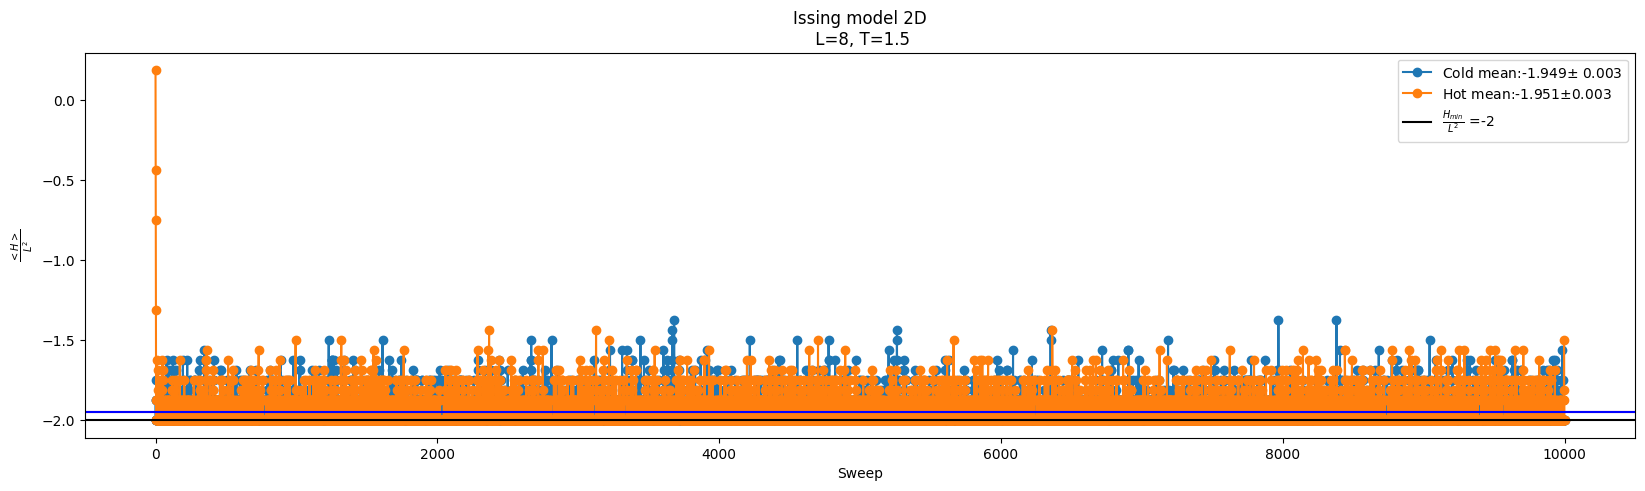

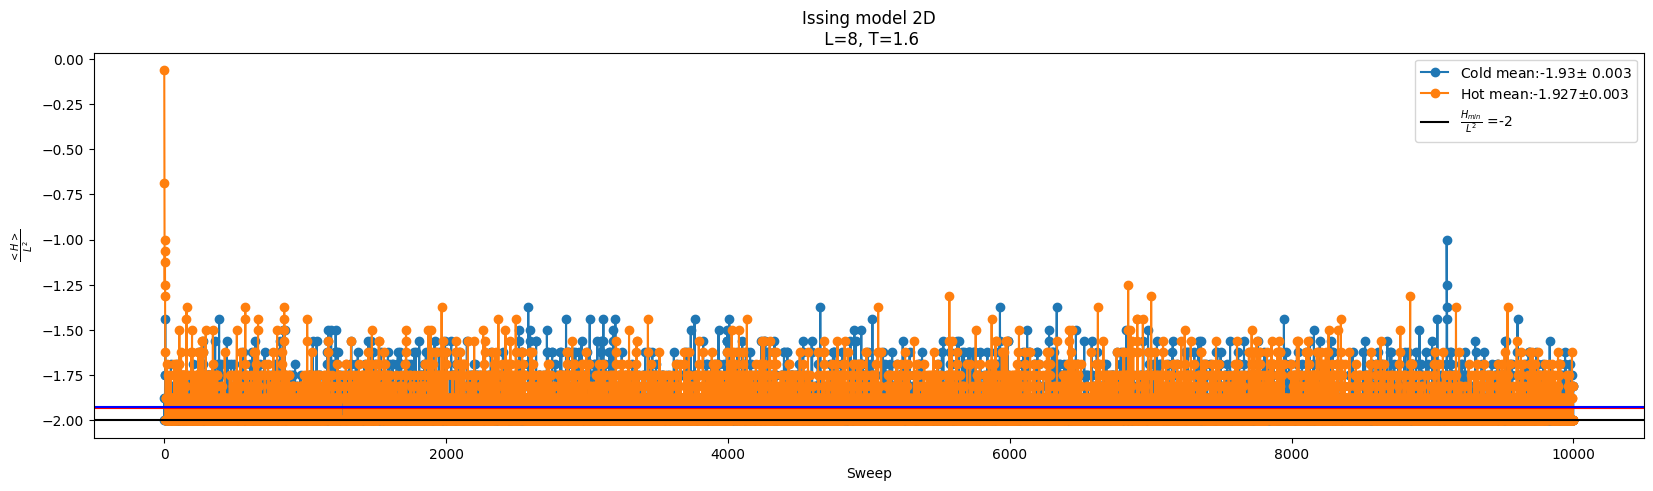

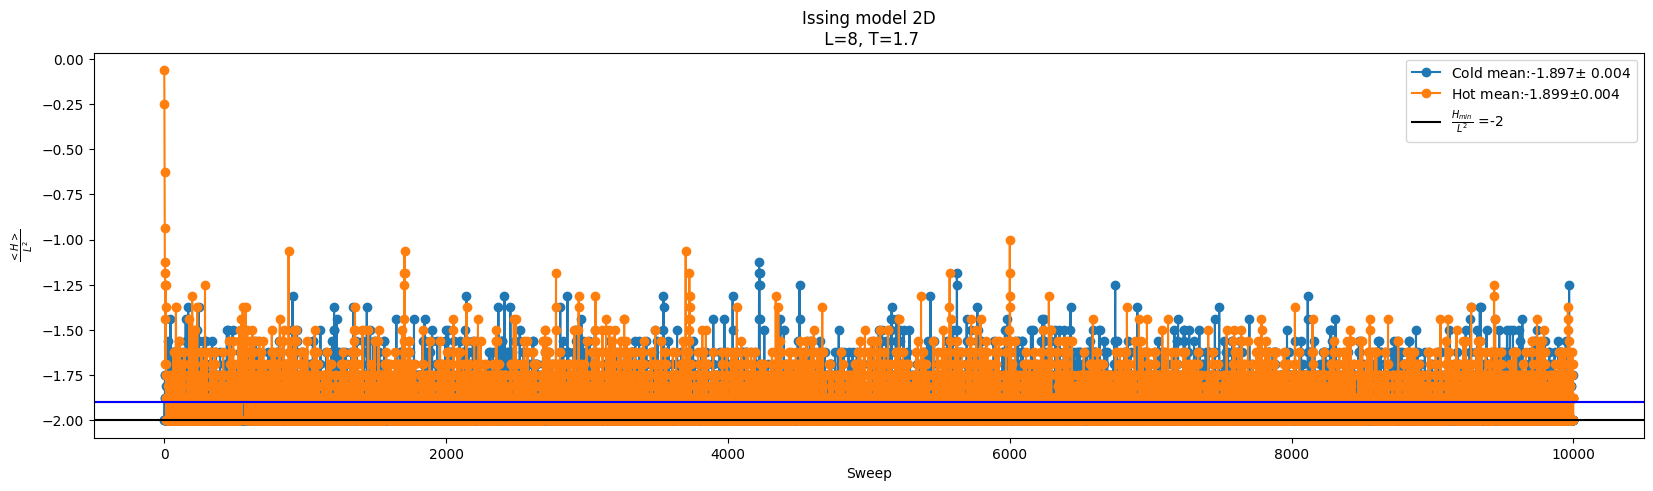

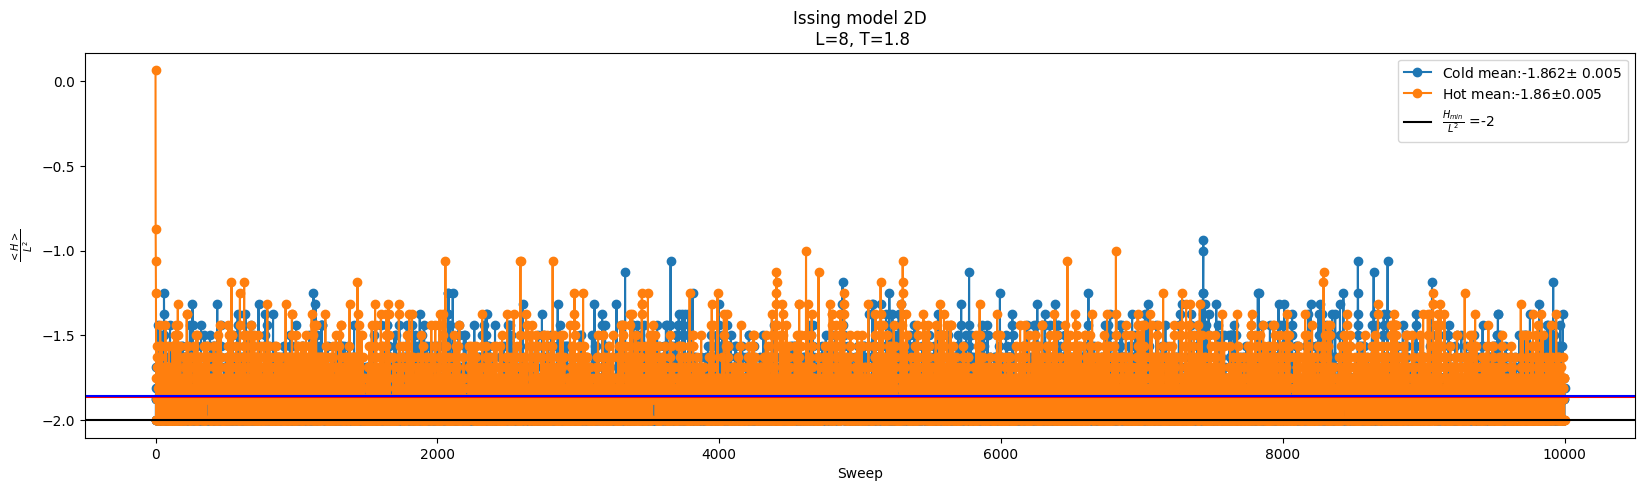

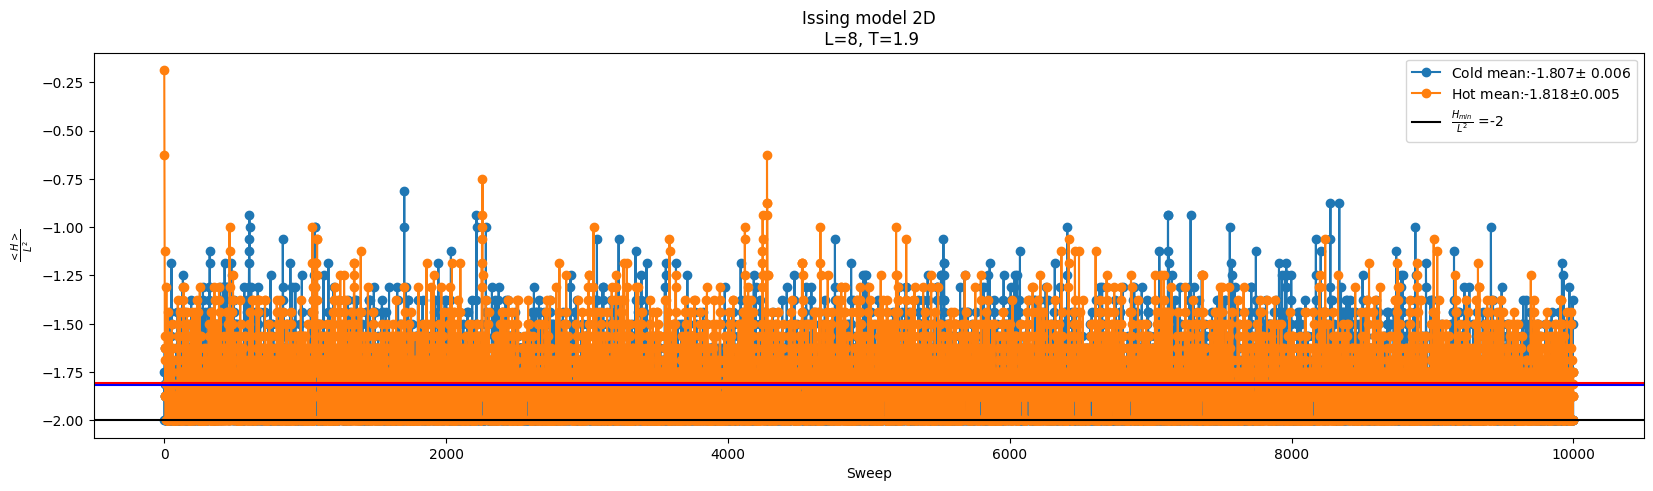

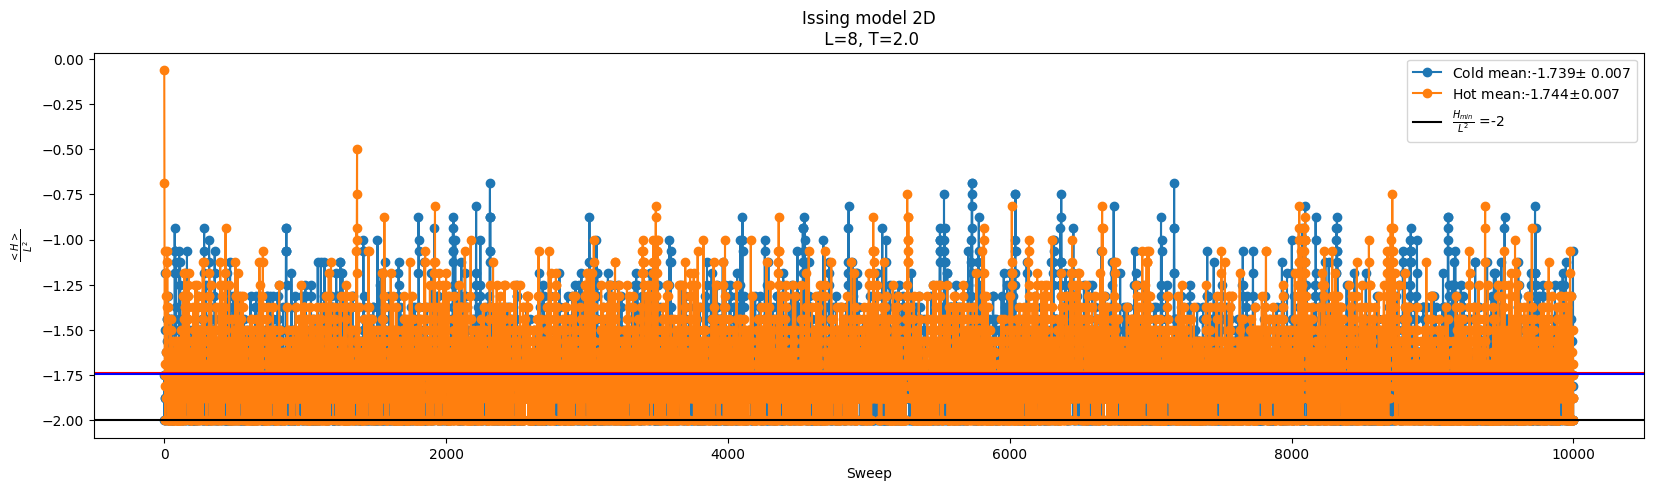

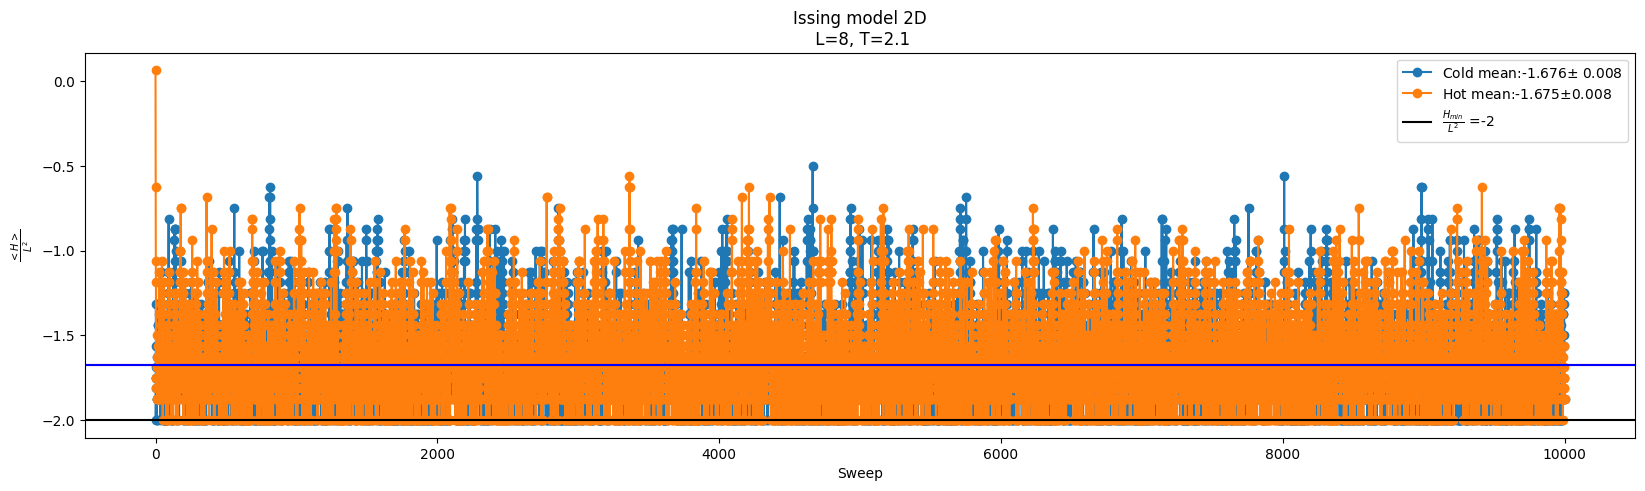

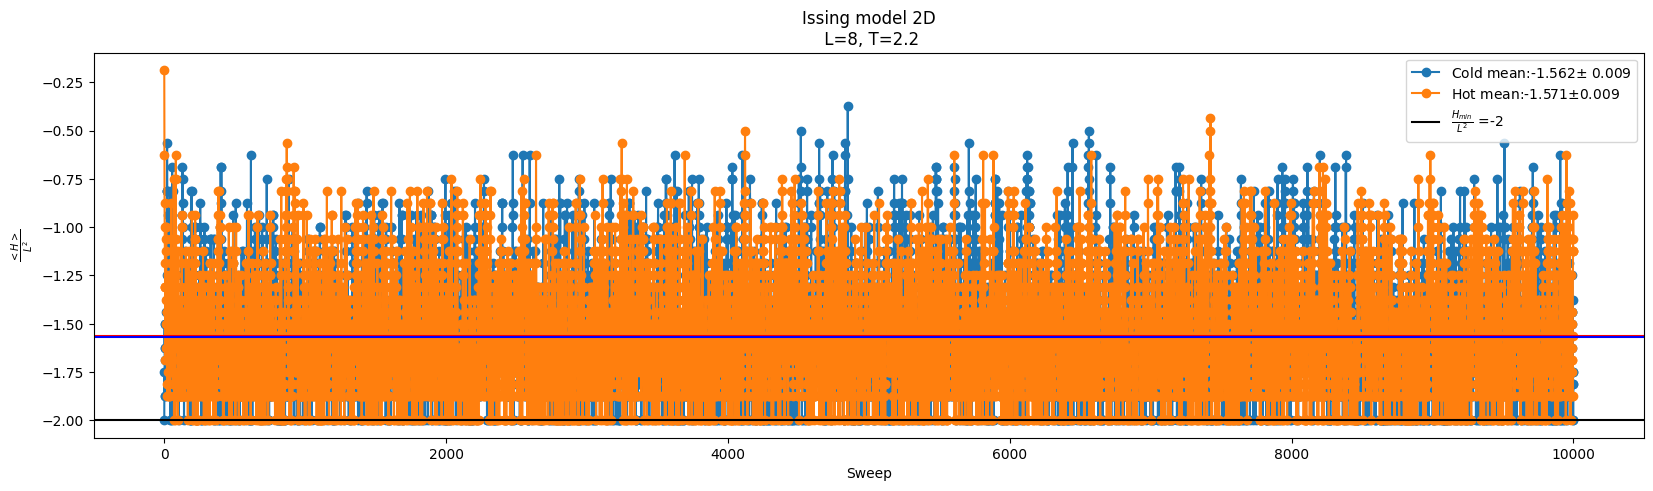

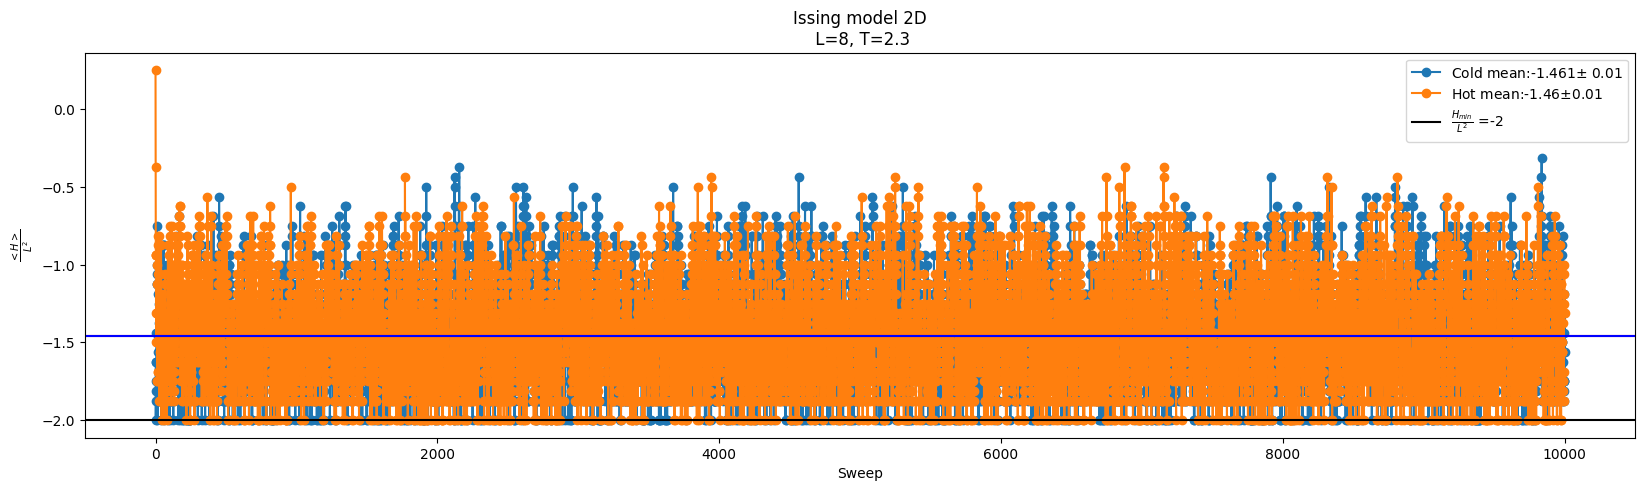

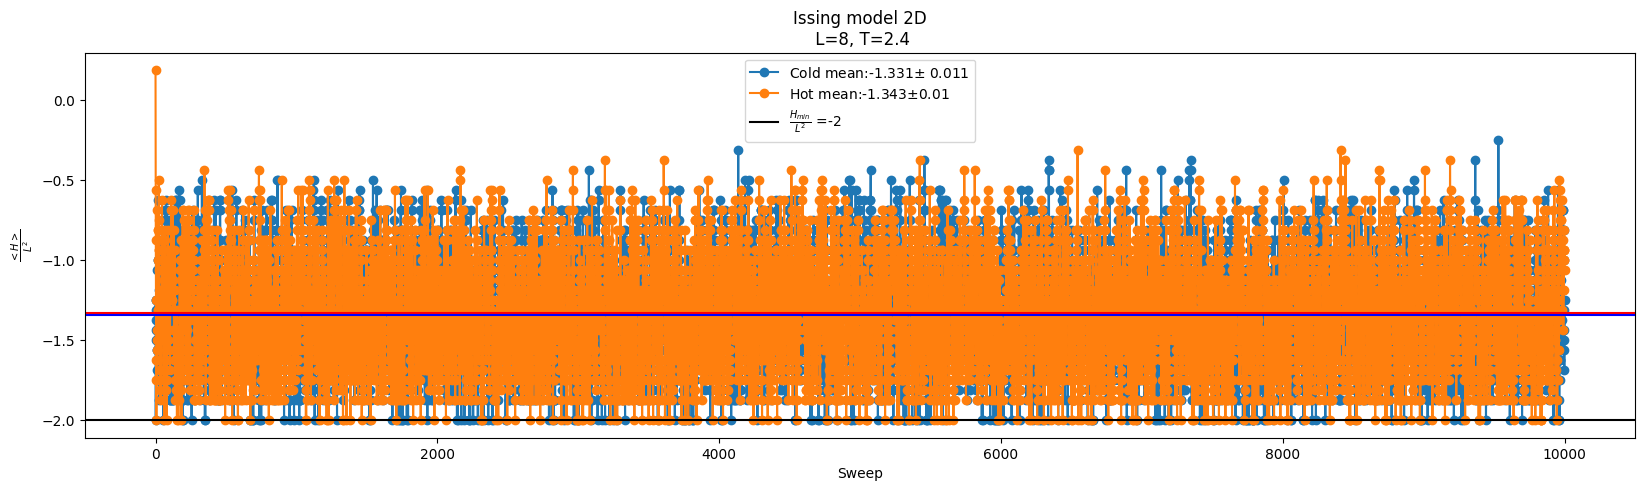

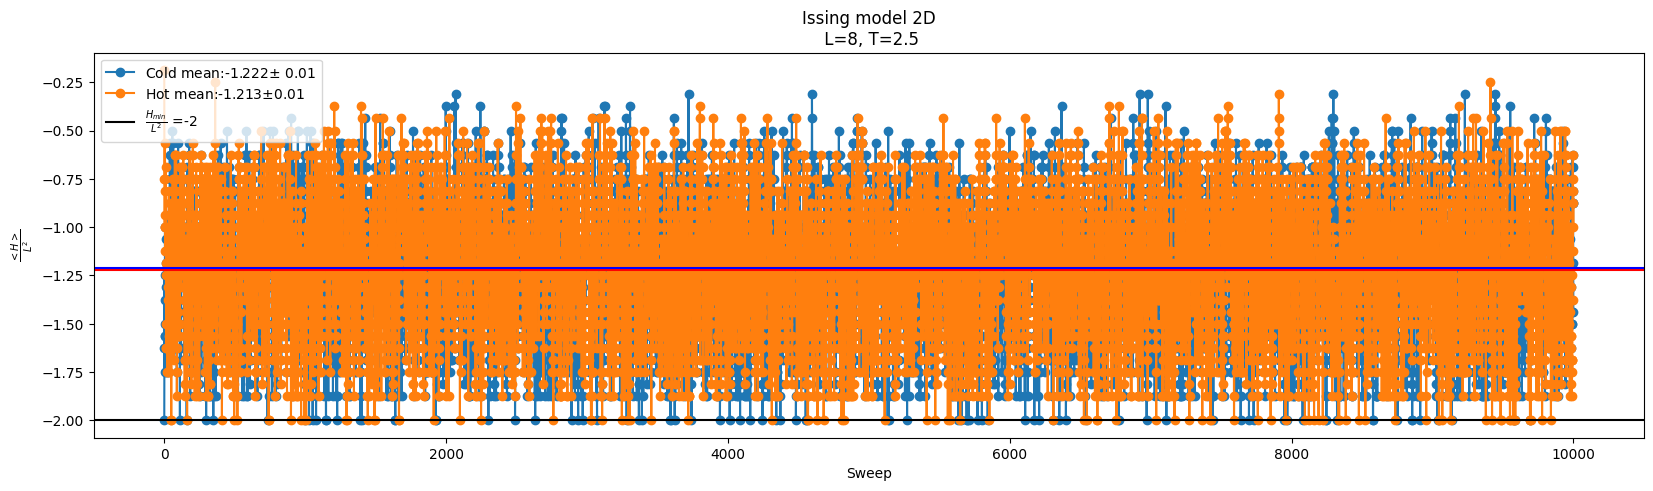

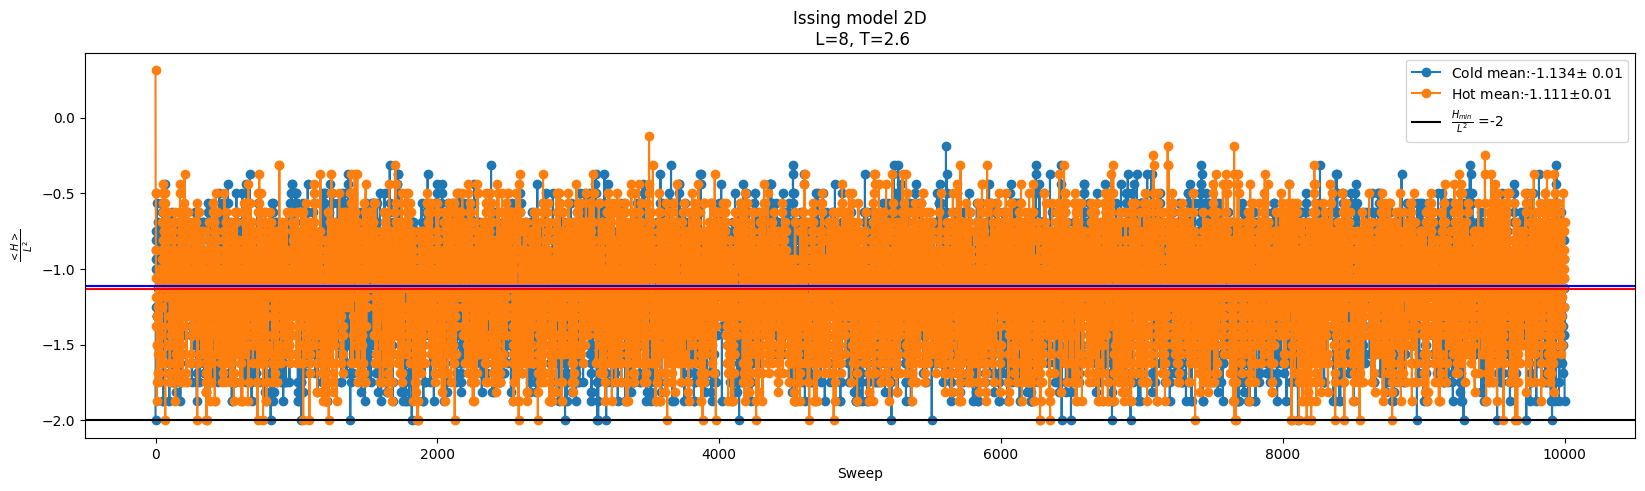

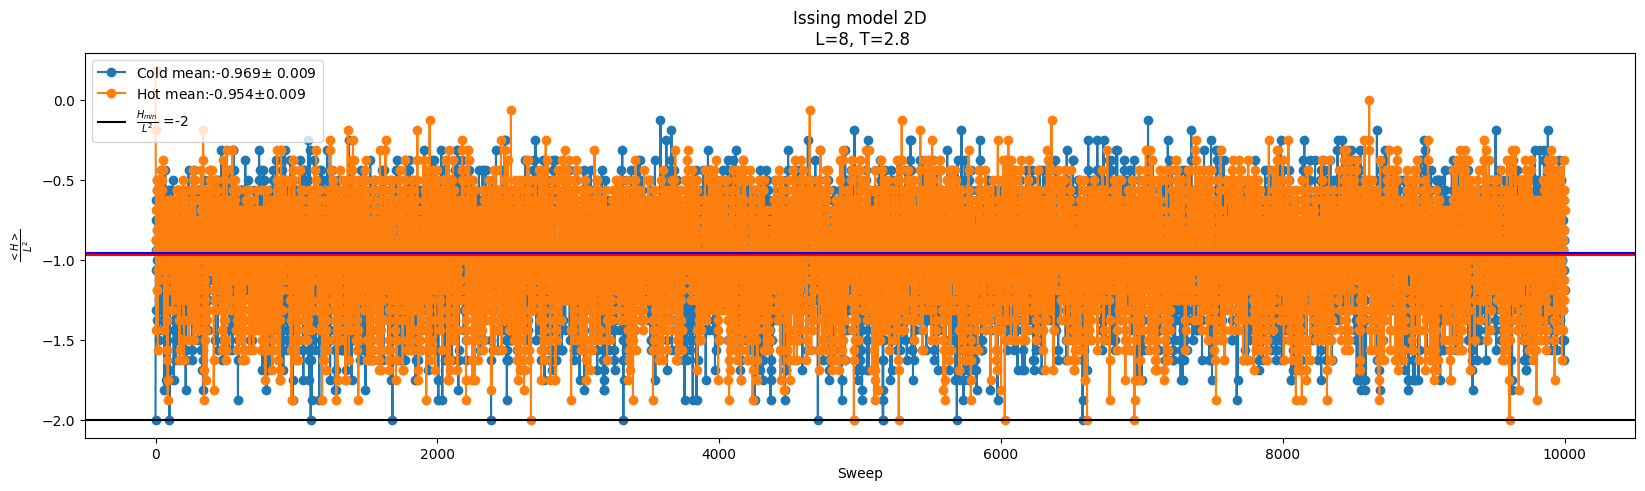

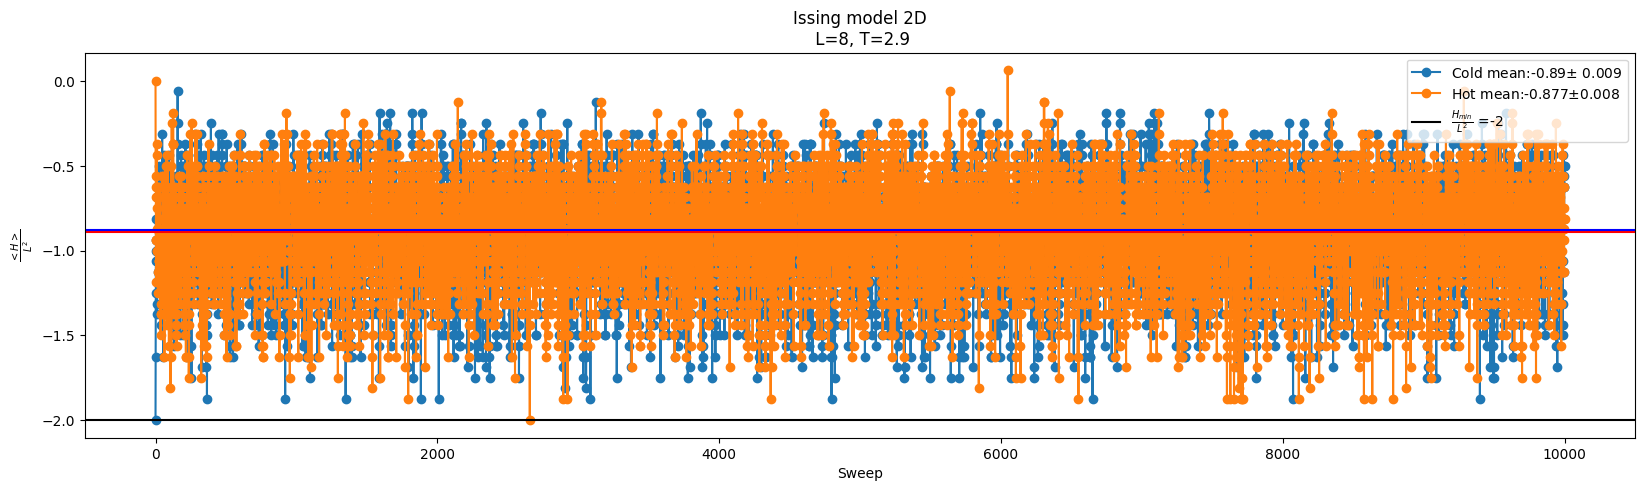

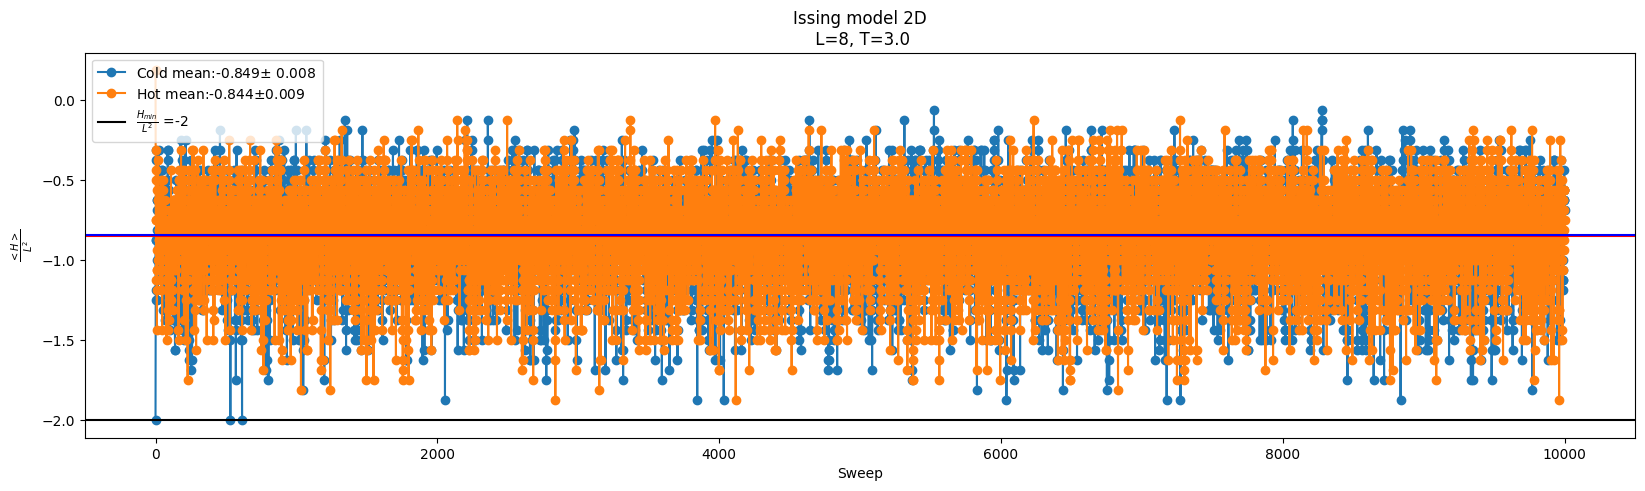

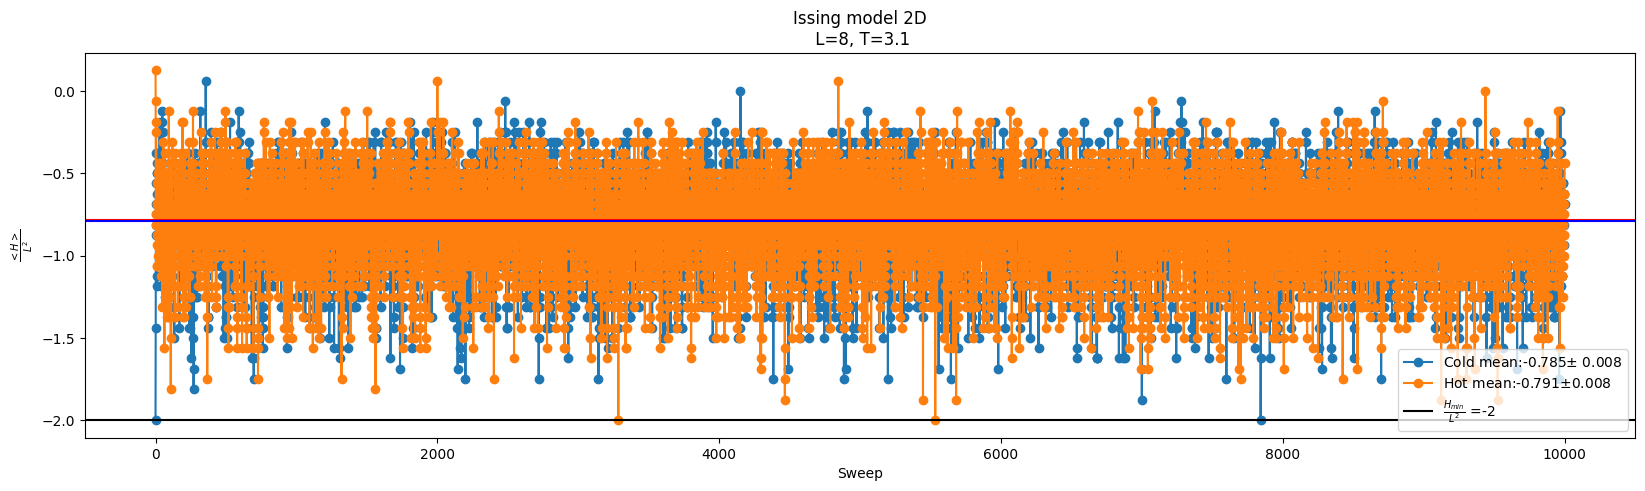

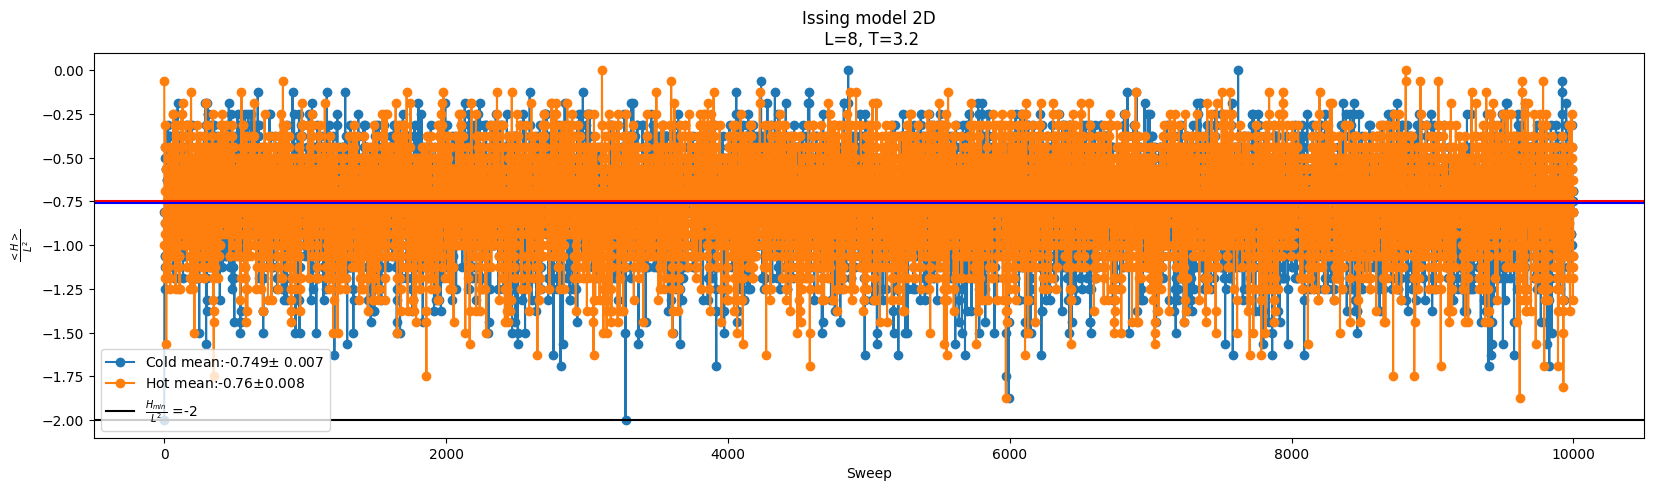

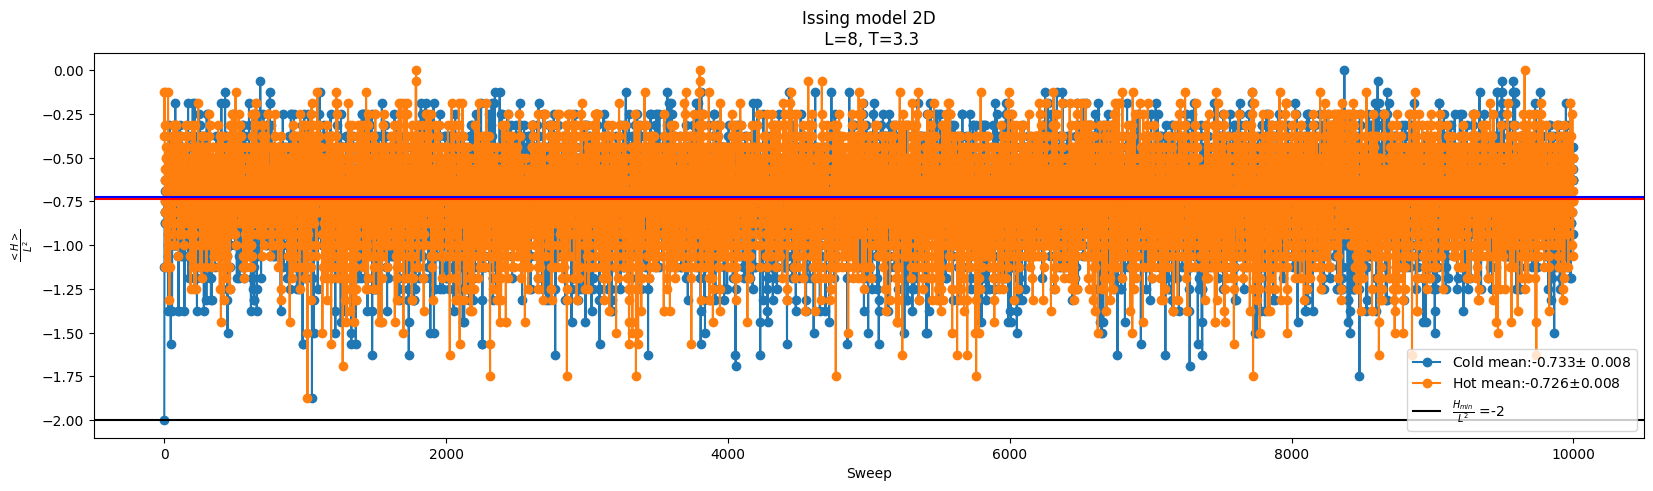

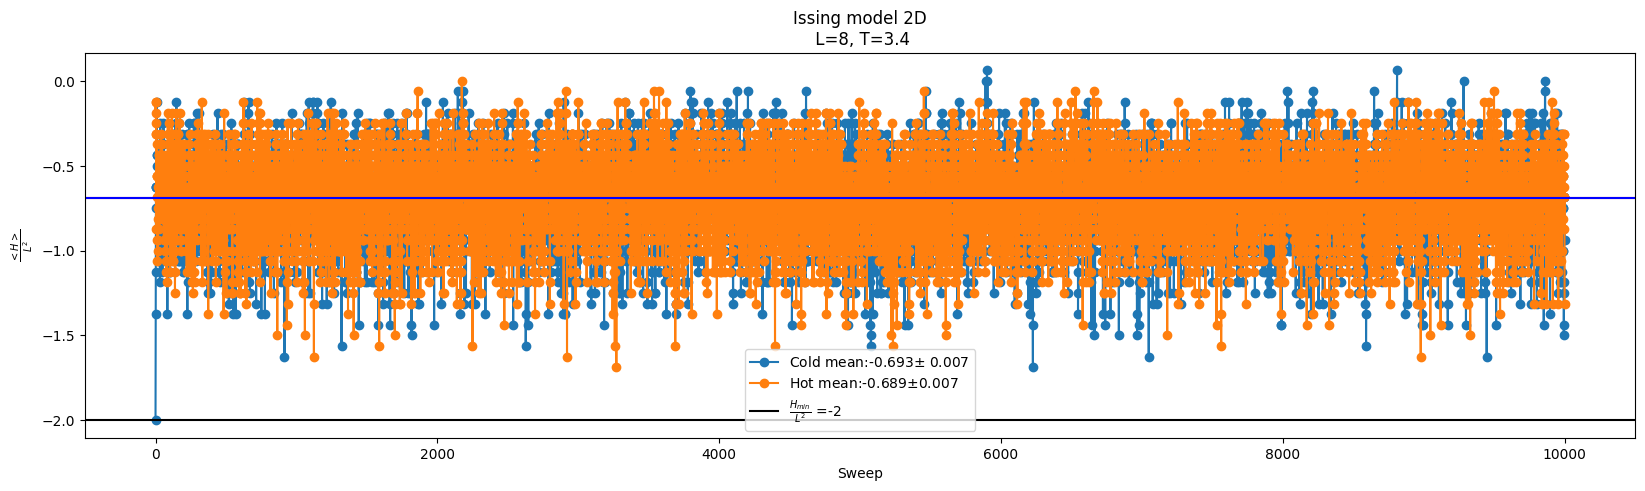

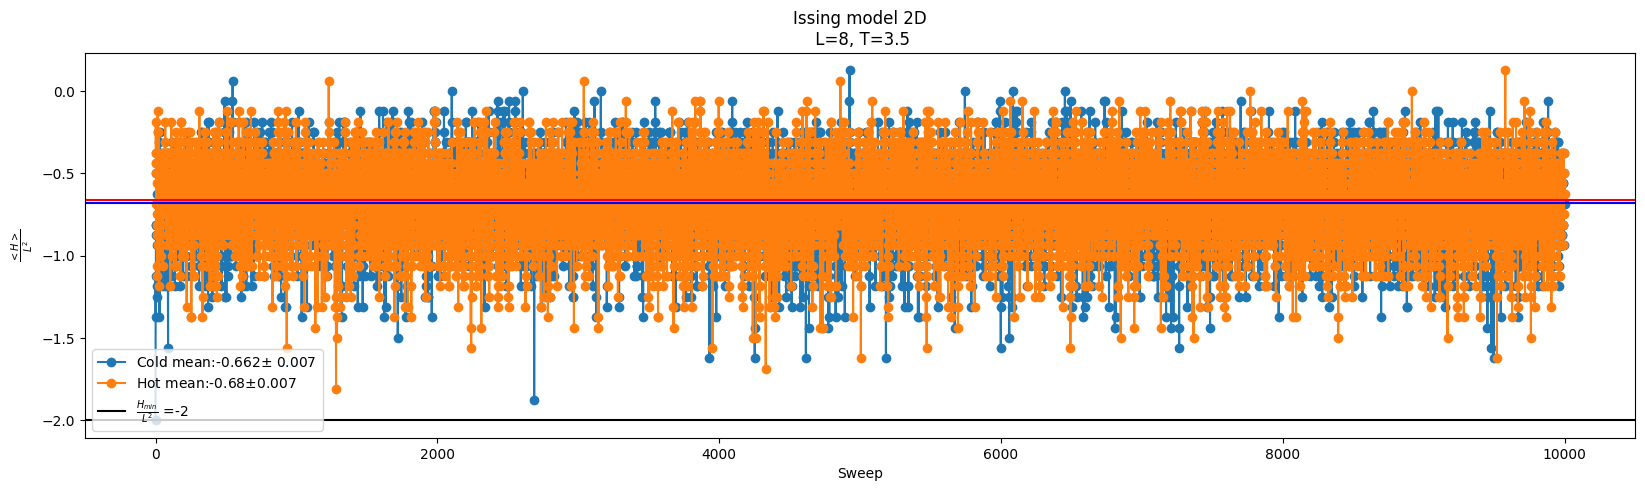

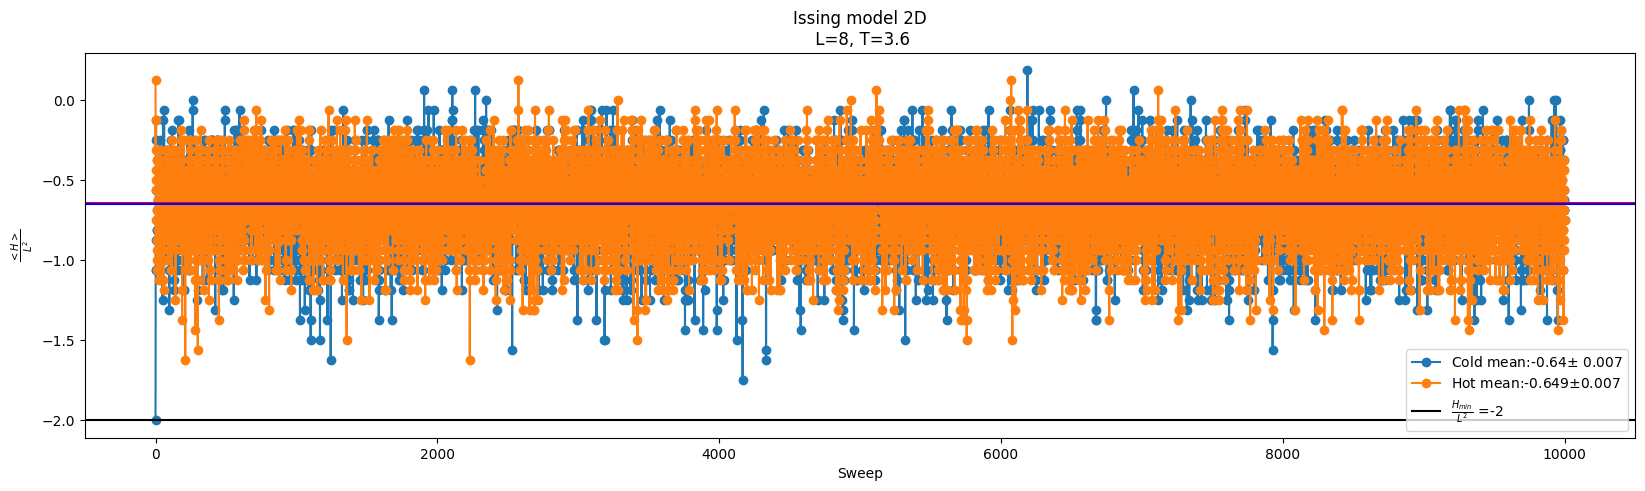

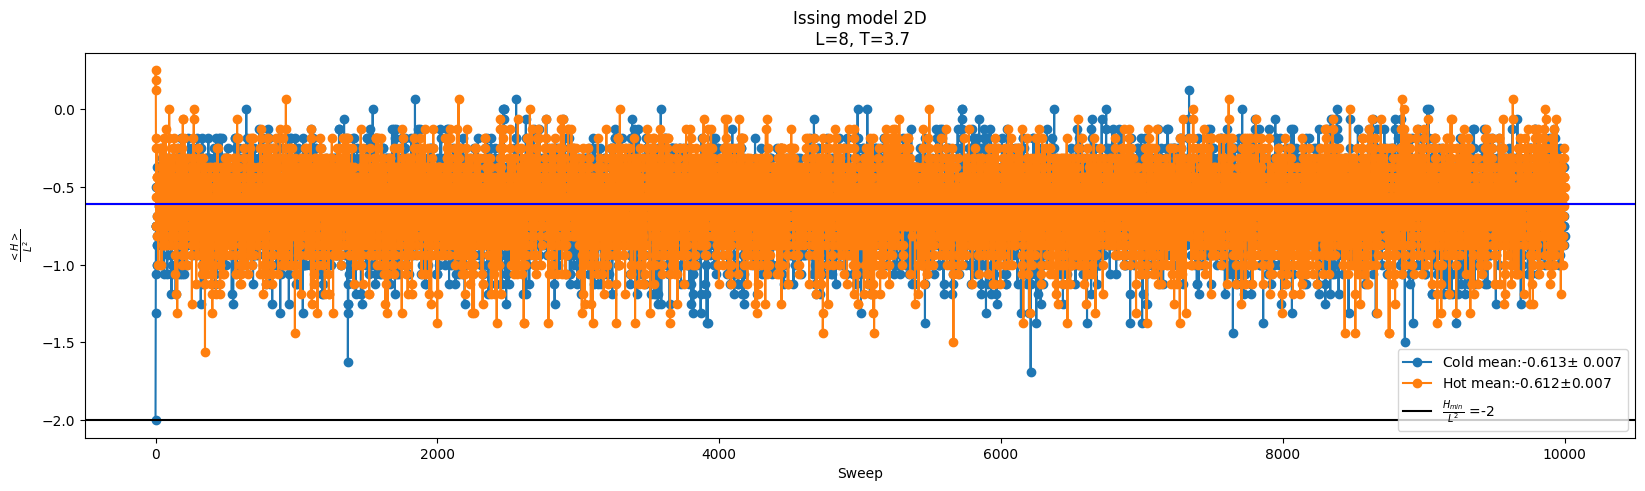

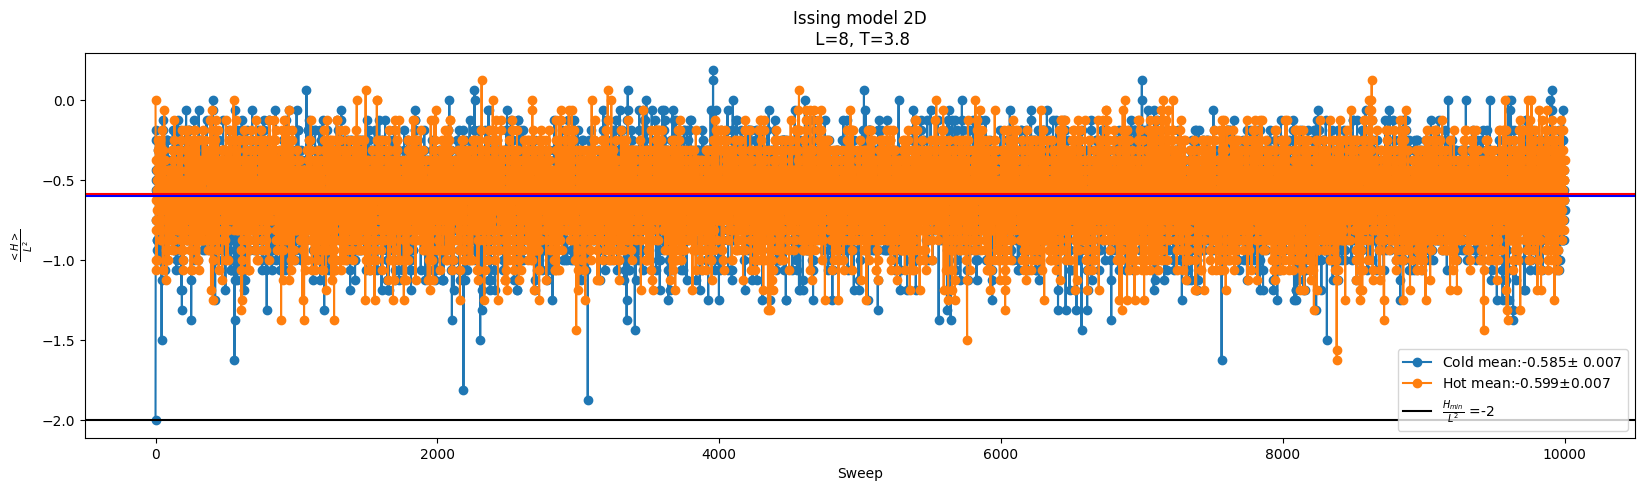

In [4]:
T_min = 1.5
T_max = 3.8
T_values = np.linspace(T_min,T_max, int((T_max - T_min) / 0.1) + 1)
energy_8 = {round(T, 1): plot_ising(T=round(T, 1), L=8) for T in T_values}

T_values = np.linspace(T_min,T_max, int((T_max - T_min) / 0.1) + 1)
energy_12 = {round(T, 1): plot_ising(T=round(T, 1), L=12,plot=False) for T in T_values}

T_values = np.linspace(T_min,T_max, int((T_max - T_min) / 0.1) + 1)
energy_16 = {round(T, 1): plot_ising(T=round(T, 1), L=16,plot=False) for T in T_values}

T_values = np.linspace(T_min,T_max, int((T_max - T_min) / 0.1) + 1)
energy_24 = {round(T, 1): plot_ising(T=round(T, 1), L=24,plot=False) for T in T_values}

In [5]:
dic = energy_12
for T in dic:

    energy_cold = dic[T][0][0]
    energy_hot = dic[T][1][0]
    
    s=3
    h_cold_lower = energy_cold-s*dic[T][0][1]
    h_cold_upper = energy_cold+s*dic[T][0][1]
    h_hot_lower = energy_hot-s*dic[T][1][1]
    h_hot_upper = energy_hot+s*dic[T][1][1]

    if energy_cold >=h_hot_lower and energy_cold <= h_hot_upper:
        print(f"cold {T}:{True}")
    else:
        print(f"cold {T}:{False}")
    
    if energy_hot >=h_cold_lower and energy_hot <= h_cold_upper:
        print(f"hot {T}:{True}")
    else:
        print(f"hot {T}:{False}")
    print("")

cold 1.5:True
hot 1.5:True

cold 1.6:True
hot 1.6:True

cold 1.7:True
hot 1.7:True

cold 1.8:True
hot 1.8:True

cold 1.9:True
hot 1.9:True

cold 2.0:True
hot 2.0:True

cold 2.1:True
hot 2.1:True

cold 2.2:True
hot 2.2:True

cold 2.3:True
hot 2.3:True

cold 2.4:True
hot 2.4:True

cold 2.5:True
hot 2.5:True

cold 2.6:True
hot 2.6:True

cold 2.8:True
hot 2.8:True

cold 2.9:True
hot 2.9:True

cold 3.0:True
hot 3.0:True

cold 3.1:True
hot 3.1:True

cold 3.2:True
hot 3.2:True

cold 3.3:True
hot 3.3:True

cold 3.4:True
hot 3.4:True

cold 3.5:True
hot 3.5:True

cold 3.6:False
hot 3.6:True

cold 3.7:True
hot 3.7:True

cold 3.8:True
hot 3.8:True



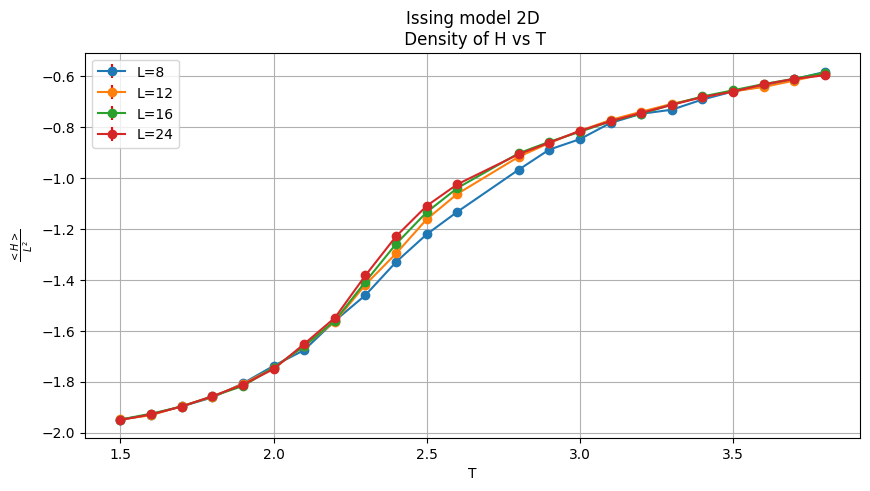

In [6]:
plt.figure(figsize=(10,5))

x = list(energy_8.keys())
y_8 = [value[0][0] for value in energy_8.values()]
y_err_8 = [value[0][1] for value in energy_8.values()]


y_12 = [value[0][0] for value in energy_12.values()]
y_err_12 = [value[0][1] for value in energy_12.values()]


y_16 = [value[0][0] for value in energy_16.values()]
y_err_16 = [value[0][1] for value in energy_16.values()]


y_24 = [value[0][0] for value in energy_24.values()]
y_err_24 = [value[0][1] for value in energy_24.values()]

plt.errorbar(x,y_8,y_err_8,marker = "o",ls = "-",ecolor="red",label = f"L=8")
plt.errorbar(x,y_12,y_err_12,marker = "o",ls = "-",ecolor="red",label = f"L=12")
plt.errorbar(x,y_16,y_err_16,marker = "o",ls = "-",ecolor="red",label = f"L=16")
plt.errorbar(x,y_24,y_err_24,marker = "o",ls = "-",ecolor="red",label = f"L=24")


plt.xlabel('T')
plt.ylabel('$\\frac{<H>}{L^2}$')
plt.title('Ising model 2D\n Density of H vs T')

plt.legend()
plt.grid()

plt.show()

$c_V=\frac{1}{L^2}(<H²>-<H>²)$

para SE $<H²<H>²>$ 

In [7]:
def Cv(dict,T):
    H = dict[T][2]
    H_2 = dict[T][2]**2

    Cv = (np.mean(H_2)-(np.mean(H))**2)/T**2
    #se = np.mean(H_2*np.mean(H)**2)
    return Cv#, se

la magnetización $M=\sum_{x,y}s_{x,y}$  y la densidad de magnetización $m=\frac{1}{L^2}<|M|>$ y de la teoría deberíamos obtener algo cercano a $<M>=0$

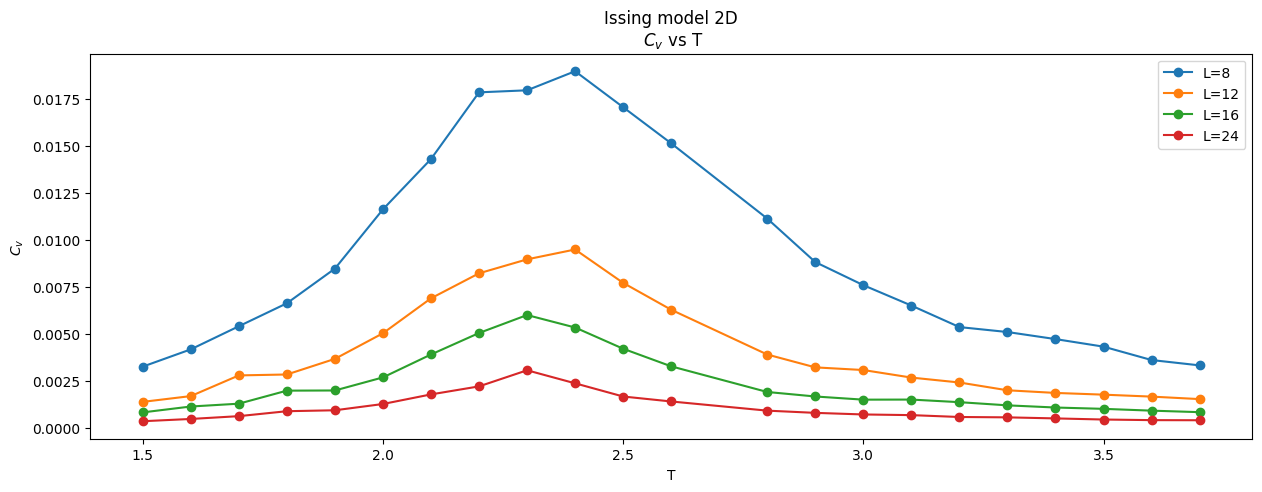

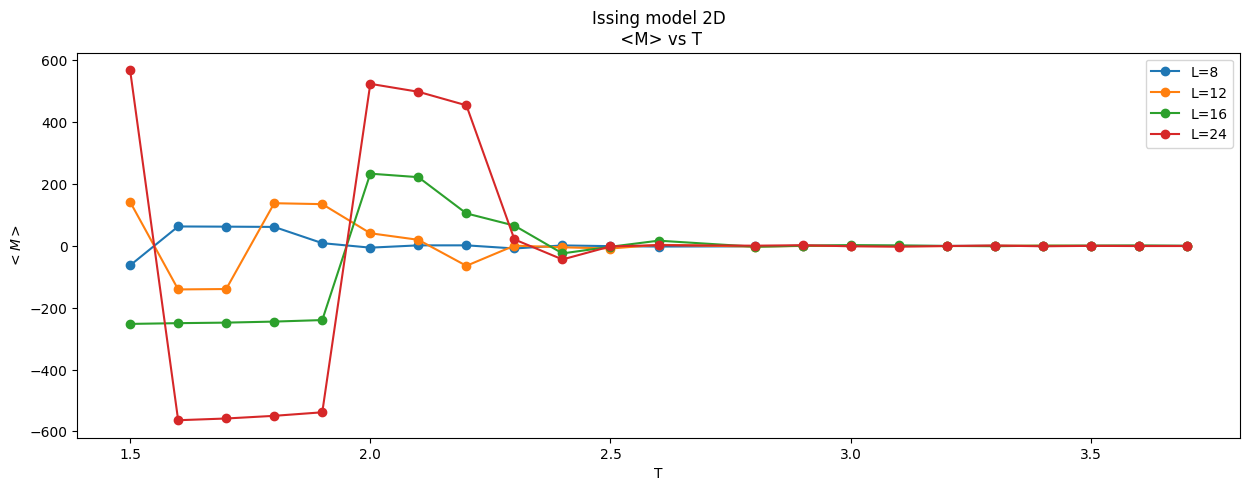

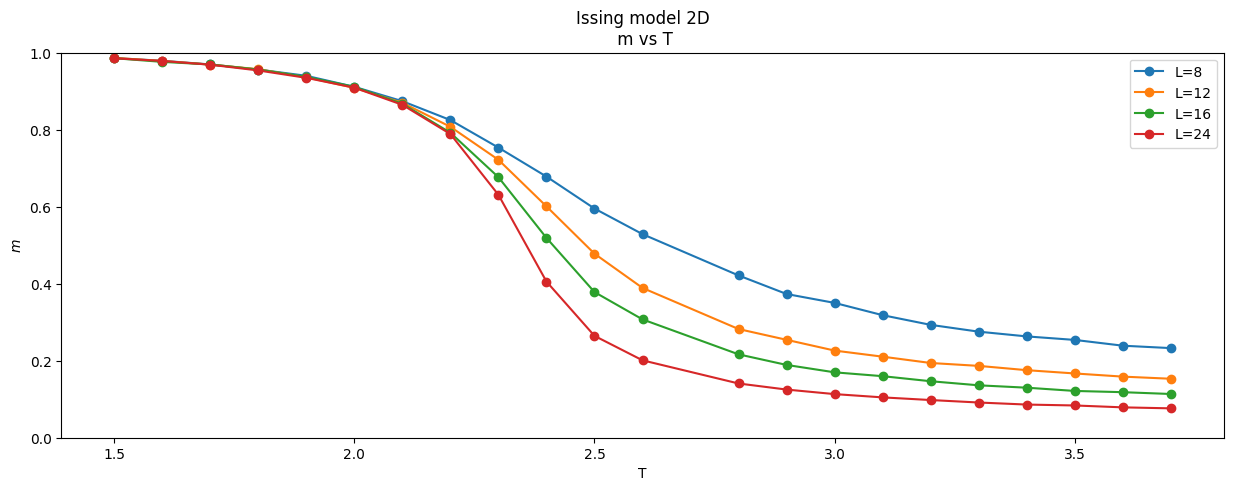

In [8]:
x = list(energy_8.keys())

M_8=[]
m_8=[]
cv_8=[]
for T in x:
    cv_8+=[Cv(energy_8,T)]
    M_8+=[np.mean(energy_8[T][4])]
    m_8+=[np.mean(np.abs(energy_8[T][4]))/8**2]

#y_err_8=[]
#for T in x:
#    y_err_8+=[Cv(energy_8,T)[1]]


M_12=[]
m_12=[]
cv_12=[]
for T in x:
    cv_12+=[Cv(energy_12,T)]
    M_12+=[np.mean(energy_12[T][4])]
    m_12+=[np.mean(np.abs(energy_12[T][4]))/12**2]

#y_err_12=[]
#for T in x:
#    y_err_12+=[Cv(energy_12,T)[1]]


M_16=[]
m_16=[]
cv_16=[]
for T in x:
    cv_16+=[Cv(energy_16,T)]
    M_16+=[np.mean(energy_16[T][4])]
    m_16+=[np.mean(np.abs(energy_16[T][4]))/16**2]

#y_err_16=[]
#for T in x:
#    y_err_16+=[Cv(energy_16,T)[1]]

M_24=[]
m_24=[]
cv_24=[]
for T in x:
    cv_24+=[Cv(energy_24,T)]
    M_24+=[np.mean(energy_24[T][4])]
    m_24+=[np.mean(np.abs(energy_24[T][4]))/24**2]

plt.figure(figsize=(15,5))
n = 1 #quitar los n últimos puntos
plt.errorbar(x[:-n],cv_8[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=8")
plt.errorbar(x[:-n],cv_12[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=12")
plt.errorbar(x[:-n],cv_16[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=16")
plt.errorbar(x[:-n],cv_24[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=24")

plt.xlabel('T')
plt.ylabel('$C_v$')
plt.title('Ising model 2D\n $C_v$ vs T')

plt.legend()

plt.show()


plt.figure(figsize=(15,5))
n = 1 #quitar los n últimos puntos
plt.errorbar(x[:-n],M_8[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=8")
plt.errorbar(x[:-n],M_12[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=12")
plt.errorbar(x[:-n],M_16[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=16")
plt.errorbar(x[:-n],M_24[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=24")

plt.xlabel('T')
plt.ylabel('$<M>$')
plt.title('Ising model 2D\n <M> vs T')

plt.legend()

plt.show()

plt.figure(figsize=(15,5))
n = 1 #quitar los n últimos puntos
plt.errorbar(x[:-n],m_8[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=8")
plt.errorbar(x[:-n],m_12[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=12")
plt.errorbar(x[:-n],m_16[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=16")
plt.errorbar(x[:-n],m_24[:-n],marker = "o",ls = "-",ecolor="red",label = f"L=24")

plt.ylim(0,1)
plt.xlabel('T')
plt.ylabel('$m$')
plt.title('Ising model 2D\n m vs T')

plt.legend()

plt.show()

gráfica m vs T, gráfica cv vs T

In [19]:
def corr_ising(T,L,plot=True):
    df_corr = pd.read_csv(f'./Datos/Ising/ising_2d_corr_t{T}_{L}.csv')
    x = df_corr["d"]
    y = df_corr["corr"]

    
    if plot:
        plt.figure(figsize=(20,5))

        plt.plot(x,y,ls="-",marker="o")
        

        plt.xlabel('d')
        plt.ylabel('corr')
        plt.title('Correlation function\n L=%d, T=%1.1f'%(L,T))

        plt.legend()
        plt.xlim(0,L)
        

        plt.show()
    #return (mean_cold,err_cold),(mean_hot,err_hot),l_cold, l_hot, M

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


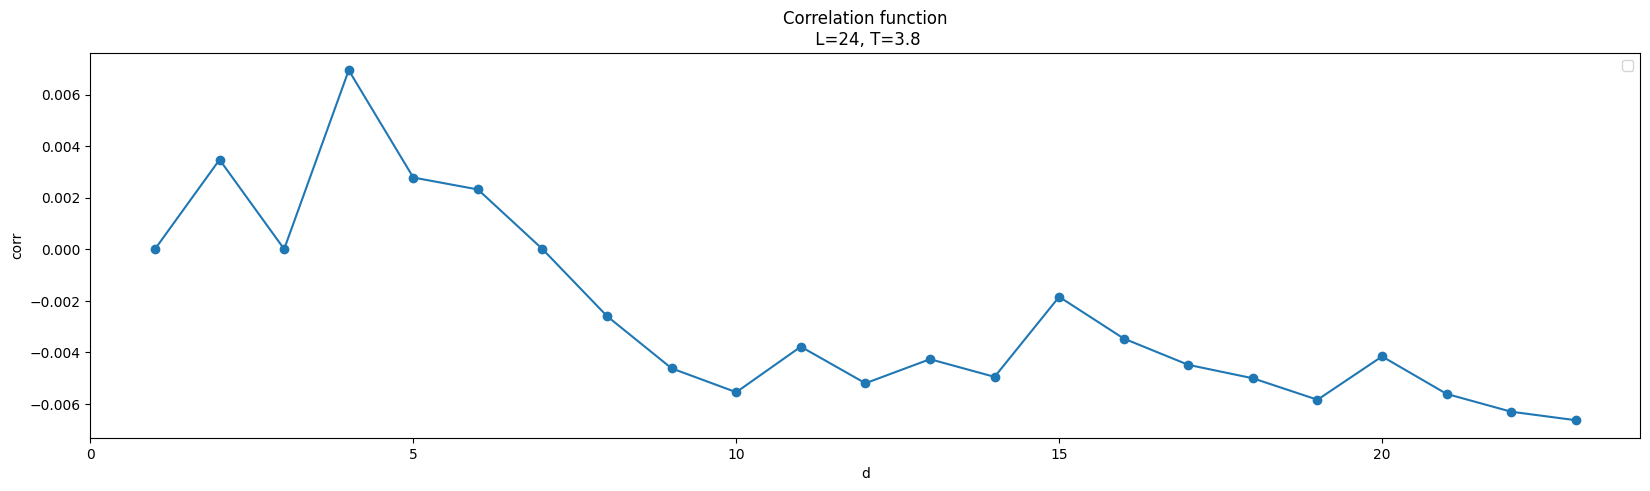

In [21]:
corr_ising(3.8,24)